In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import sklearn
import re
from scipy.spatial.distance import jaccard
from sklearn.cluster import SpectralClustering as cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.spatial import distance

In [ ]:
#Look at members who commented in on graph and then became OP of another

In [2]:
def jaccard_similarity(A, B):
    #Find intersection of two sets
    nominator = np.intersect1d(A,B)

    #Find union of two sets
    denominator = np.union1d(A,B)

    #Take the ratio of sizes
    similarity = len(nominator)/len(denominator)
    
    return similarity

def getDistanceMatrix(thread):
    matrix = []
    for i in range(0,len(thread)):
        row = []
        for j in range(0,len(thread)):
            dist = 1 - jaccard_similarity(thread[i],thread[j]) #1 - len(set(thread[i]).intersection(set(thread[j])))/len(thread[i])
            row.append(dist)
        matrix.append(row)
    return matrix

In [3]:
data = pd.read_csv("GawaherSentiment.csv", index_col = 0)

In [4]:
data.head()

,MessageID,ThreadID,ThreadName,MemberID,MemberName,Message,P_Year,P_Month,P_Day,P_Date,ThreadFirstMessageID,NLTK,SentiStrength,AllenNLP
0,1000,240,Music in Islam,Moustafa,Moustafa,"<quote>Quote Assalaamualaikum, Regardless of w...",2004,10,25,2004-10-25 18:22:00.000,806,0.9246,0.458831,-0.072225
1,100013,2583,Islam in Turkey,elif74,elif74,"yes, this is very sad. but there are more peop...",2005,3,26,2005-03-26 08:59:00.000,24378,-0.2500,-0.612372,-0.657981
2,1000177,533029,Just When You Thought Iran Couldn't Get Any Cr...,troof,troof,"<quote>Yasnov, on Oct 26 2008, 02:13 AM, said:...",2008,10,26,2008-10-26 11:04:00.000,993099,-0.1280,-0.250000,-0.993870
3,1000246,533029,Just When You Thought Iran Couldn't Get Any Cr...,Yasnov,Yasnov,"<quote>troof, on Oct 26 2008, 06:04 PM, said: ...",2008,10,26,2008-10-26 15:08:00.000,993099,-0.1280,0.000000,-0.994138
4,100026,10096,"What Would You Do, If Someone (opposite)",Teakster,Teakster,"Salaam, I would jump in the Teakster mobile an...",2005,3,26,2005-03-26 10:16:00.000,94941,-0.6597,-0.458831,-0.787048


# Cluster Members

In [5]:
members = list(data["MemberID"].unique())
threads = list(data["ThreadID"].unique())

In [20]:
memberVectors = []
threadsVisited = []
for i in members:
    
    thread = data[data["MemberID"] == i]["ThreadID"].unique()
    #vector = np.zeros(len(threads))
    #for i in thread:
        #vector[threads.index(i)] +=1
    
    memberVectors.append(thread)
    threadsVisited.append(len(thread))

In [7]:
matrix = getDistanceMatrix(memberVectors)

In [8]:
sentiment = []

for i in members:
    
     sentiment.append(np.mean(data[data["MemberID"] == i]["AllenNLP"]))

In [9]:
dt = [('len', float)]
A = np.array(matrix)
A = A.view(dt)

G = nx.from_numpy_matrix(np.array(A))

plt.figure(figsize = (12,6))
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='neato')
G.remove_edges_from(list(G.edges()))


<Figure size 864x432 with 0 Axes>

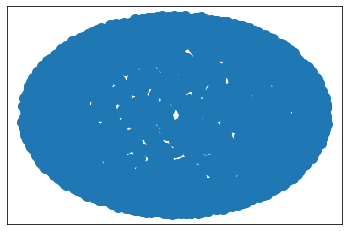

In [10]:
nx.drawing.nx_pylab.draw_networkx(G,pos=pos,node_size = 100,alpha = 1,with_labels=False)

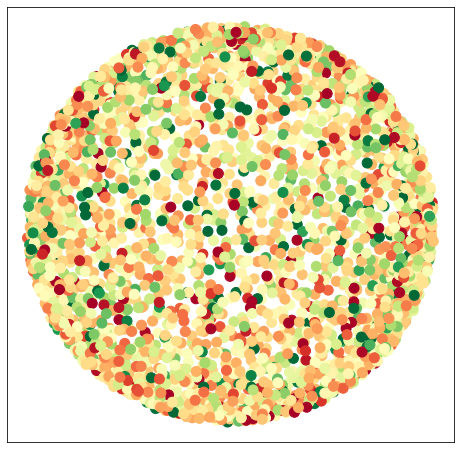

In [11]:
plt.figure(figsize = (8,8))
nx.drawing.nx_pylab.draw_networkx(G,pos=pos,node_size = 100,alpha = 1,with_labels=False, node_color = sentiment, cmap = "RdYlGn")


Median = 3.0


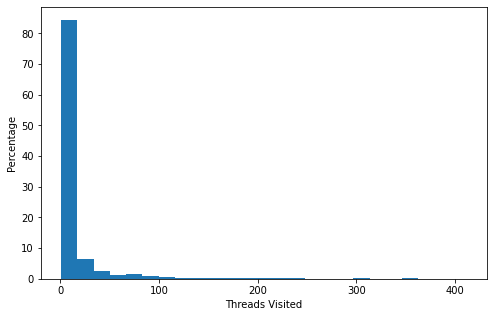

In [54]:
plt.figure(figsize = (8,5))
plt.hist(np.array(threadsVisited), bins = 25, weights=100*np.ones(len(threadsVisited)) / len(threadsVisited))
plt.xlabel("Threads Visited")
plt.ylabel("Percentage")
print("Median = " + str(np.median(threadsVisited)))

# Look at active members

In [75]:
np.percentile(threadsVisited, 95) 

70.0

In [76]:
active = np.array(members)[np.array(threadsVisited) >= 70]

In [77]:
activeVectors = []
for i in active:
    thread = data[data["MemberID"] == i]["ThreadID"].unique()
    activeVectors.append(thread)
    

In [78]:
activeMatrix = getDistanceMatrix(activeVectors)

In [79]:
dt = [('len', float)]
A = np.array(activeMatrix)
A = A.view(dt)

Gactive = nx.from_numpy_matrix(np.array(A))

plt.figure(figsize = (12,6))
posActive = nx.drawing.nx_agraph.graphviz_layout(Gactive, prog='neato')
Gactive.remove_edges_from(list(Gactive.edges()))

<Figure size 864x432 with 0 Axes>

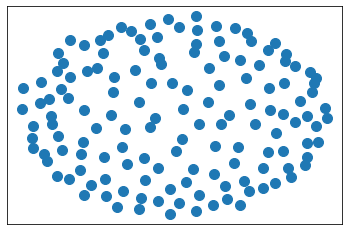

In [80]:
nx.drawing.nx_pylab.draw_networkx(Gactive,pos=posActive,node_size = 100,alpha = 1,with_labels=False)

# Cluster Threads

In [55]:
threadVectors = []
threadMembers = []
for i in threads:
    
    member = data[data["ThreadID"] == i]["MemberID"].unique()
    #vector = np.zeros(len(members))
    #for i in member:
        #vector[members.index(i)] +=1
    
    threadVectors.append(member)
    threadMembers.append(len(member))

In [15]:
threadSentiment = []

for i in threads:
    
     threadSentiment.append(np.mean(data[data["ThreadID"] == i]["AllenNLP"]))

In [16]:
threadMatrix = getDistanceMatrix(threadVectors)

In [17]:
dt = [('len', float)]
A = np.array(threadMatrix)
A = A.view(dt)

Gthread = nx.from_numpy_matrix(np.array(A))

threadPos = nx.drawing.nx_agraph.graphviz_layout(Gthread, prog='neato')
Gthread.remove_edges_from(list(Gthread.edges()))


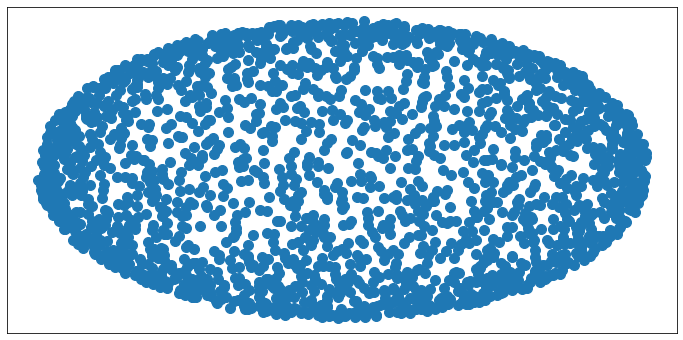

In [18]:
plt.figure(figsize = (12,6))
nx.drawing.nx_pylab.draw_networkx(Gthread,pos=pos,node_size = 100,alpha = 1,with_labels=False)

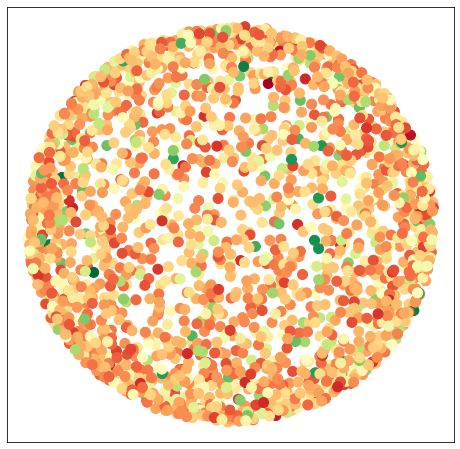

In [19]:
plt.figure(figsize = (8,8))
nx.drawing.nx_pylab.draw_networkx(Gthread,pos=pos,node_size = 100,alpha = 1,with_labels=False, node_color = threadSentiment, cmap = "RdYlGn")


Median = 16.0


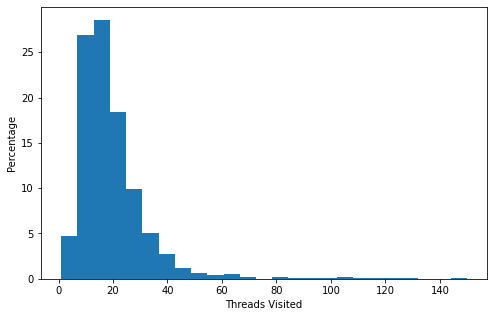

In [56]:
plt.figure(figsize = (8,5))
plt.hist(np.array(threadMembers), bins = 25, weights=100*np.ones(len(threadMembers)) / len(threadMembers))
plt.xlabel("Threads Visited")
plt.ylabel("Percentage")
print("Median = " + str(np.median(threadMembers)))